# Capstone Project NLP

## Phase 1 Cleaning

### Reading TRAIN and TEST DATA

In [1]:
# Reading TRAIN DATA - Positive

import os
import pandas as pd
import numpy as np

path = 'C:\\Users\\Gaurav\\Desktop\\Digital Vidya\\Capstone Project 1 Natural Language Processing\\aclImdb\\train\pos\\'

train_pos_data = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]

for f in files:
    with open (f, "r",encoding="iso-8859-1") as myfile:
        train_pos_data.append(myfile.read())

In [2]:
# Reading TRAIN DATA - Negative

path = 'C:\\Users\\Gaurav\\Desktop\\Digital Vidya\\Capstone Project 1 Natural Language Processing\\aclImdb\\train\\neg\\'

train_neg_data = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]

for f in files:
    with open (f, "r",encoding="iso-8859-1") as myfile:
        train_neg_data.append(myfile.read())

In [11]:
# TRAIN DATA - Positive DataFrame
train_df_p = pd.DataFrame(train_pos_data, columns=['review'])
train_df_p['label'] = 'positive'
train_df_p.head()
train_df_p.shape

(12500, 2)

In [12]:
# TRAIN DATA - Negative DataFrame

train_df_n = pd.DataFrame(train_neg_data, columns=['review'])
train_df_n.head()
train_df_n['label'] = 'negative'
train_df_n.head()
train_df_n.shape

(12500, 2)

In [16]:
# Concatnating Positive and Negative Train Data

train_df = pd.concat([train_df_p, train_df_n])
train_df.shape

(25000, 2)

In [18]:
# Writing Train DataFrame to a CSV file

train_df.to_csv('Train_Data.csv')  

In [27]:
# Reading TEST DATA - pos

path = 'C:\\Users\\Gaurav\\Desktop\\Digital Vidya\\Capstone Project 1 Natural Language Processing\\aclImdb\\test\pos\\'

test_pos_data = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]

for f in files:
    with open (f, "r",encoding="iso-8859-1") as myfile:
        test_pos_data.append(myfile.read())

In [28]:
# Reading TEST DATA - neg

path = 'C:\\Users\\Gaurav\\Desktop\\Digital Vidya\\Capstone Project 1 Natural Language Processing\\aclImdb\\test\\neg\\'

test_neg_data = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]

for f in files:
    with open (f, "r",encoding="iso-8859-1") as myfile:
        test_neg_data.append(myfile.read())

In [29]:
# Test DATA - Positive DataFrame
test_df_p = pd.DataFrame(test_pos_data, columns=['review'])
test_df_p['label'] = 'positive'
test_df_p.shape

# Test DATA - Negative DataFrame

test_df_n = pd.DataFrame(test_neg_data, columns=['review'])
test_df_n.head()
test_df_n['label'] = 'negative'
test_df_n.head()
test_df_n.shape

# Concatnating Positive and Negative Test Data

test_df = pd.concat([test_df_p, test_df_n])
test_df.shape

(25000, 2)

In [30]:
# Writing Test DataFrame to a CSV file

test_df.to_csv('Test_Data.csv')

### Removing HTML tags and Punctuations

In [31]:
import string 
import re   # regular expressions library

tags = re.compile('<.*?>')
tags

# Train Data

train_df['review'] = train_df['review'].str.replace(tags, ' ') # Removing HTML tags
train_df.head()

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,positive
1,Homelessness (or Houselessness as George Carli...,positive
2,Brilliant over-acting by Lesley Ann Warren. Be...,positive
3,This is easily the most underrated film inn th...,positive
4,This is not the typical Mel Brooks film. It wa...,positive


In [32]:
punctuation = string.punctuation
punctuation

# Train Data

train_df['review']  = train_df['review'].str.replace('[{}]'.format(string.punctuation), '')# Removing punctuation
train_df.head()


,review,label
0,Bromwell High is a cartoon comedy It ran at th...,positive
1,Homelessness or Houselessness as George Carlin...,positive
2,Brilliant overacting by Lesley Ann Warren Best...,positive
3,This is easily the most underrated film inn th...,positive
4,This is not the typical Mel Brooks film It was...,positive


In [33]:
# Train Data After Removing HTML Tags and Punctuation
train_df.to_csv('TrainData_AfterRemovingHTMLandPunc.csv')

In [34]:
# TEST Data
test_df['review'] = test_df['review'].str.replace(tags, ' ') # Removing HTML tags


In [35]:
test_df['review'] = test_df['review'].str.replace('[{}]'.format(string.punctuation), '')# Removing punctuation

In [36]:
# Train Data After Removing HTML Tags and Punctuation
test_df.to_csv('TestData_AfterRemovingHTMLandPunc.csv')

### Removing Stopwords

In [15]:
import nltk
from nltk.corpus import stopwords


In [71]:
# read dataframe
import pandas as pd
train_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/TrainData_AfterRemovingHTMLandPunc.csv", encoding='ISO-8859-1', engine='c')
train_df['review'] = train_df['review'].str.lower()

,Unnamed: 0,review,label
0,0,bromwell high is a cartoon comedy it ran at th...,positive
1,1,homelessness or houselessness as george carlin...,positive
2,2,brilliant overacting by lesley ann warren best...,positive
3,3,this is easily the most underrated film inn th...,positive
4,4,this is not the typical mel brooks film it was...,positive


In [45]:
from nltk.tokenize import word_tokenize
 
clean_review =[]
 
Stopwords = stopwords.words('english')
 
for f in train_df['review']:
    word_tokens = word_tokenize(f)
    clean = [w for w in word_tokens if w not in Stopwords]
    f_new = " ".join(clean)
    clean_review.append(f_new)
 

train_df['review'] = clean_review

In [46]:
train_df.head()

,Unnamed: 0,review,label
0,0,bromwell high cartoon comedy ran time programs...,positive
1,1,homelessness houselessness george carlin state...,positive
2,2,brilliant overacting lesley ann warren best dr...,positive
3,3,easily underrated film inn brooks cannon sure ...,positive
4,4,typical mel brooks film much less slapstick mo...,positive


In [47]:
train_df.to_csv('Train_df_AfterRemoving_Stopwords.csv')

In [70]:
# read dataframe
test_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/TestData_AfterRemovingHTMLandPunc.csv", encoding='ISO-8859-1', engine='c')
test_df['review'] = test_df['review'].str.lower()
test_df.head()

,Unnamed: 0,review,label
0,0,i went and saw this movie last night after bei...,positive
1,1,actor turned director bill paxton follows up h...,positive
2,2,as a recreational golfer with some knowledge o...,positive
3,3,i saw this film in a sneak preview and it is d...,positive
4,4,bill paxton has taken the true story of the 19...,positive


In [50]:
clean_review =[]
 
Stopwords = stopwords.words('english')
 
for f in test_df['review']:
    word_tokens = word_tokenize(f)
    clean = [w for w in word_tokens if w not in Stopwords]
    f_new = " ".join(clean)
    clean_review.append(f_new)
 

test_df['review'] = clean_review

In [51]:
test_df.head()

,Unnamed: 0,review,label
0,0,went saw movie last night coaxed friends mine ...,positive
1,1,actor turned director bill paxton follows prom...,positive
2,2,recreational golfer knowledge sports history p...,positive
3,3,saw film sneak preview delightful cinematograp...,positive
4,4,bill paxton taken true story 1913 us golf open...,positive


In [52]:
test_df.to_csv('Test_df_AfterRemoving_Stopwords.csv')

### Removing meaningless words/ Neutral (Noise Words)
#### Finding most common words which add noise to the data and not important for our analysis.

In [204]:
from collections import Counter

train_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/Train_df_AfterRemoving_Stopwords.csv", encoding='ISO-8859-1', engine='c')

Counter(" ".join(train_df['review']).split()).most_common(10)   #Finding Most Meaningless Words From Train Data

[('movie', 42663),
 ('film', 38252),
 ('one', 25723),
 ('like', 19678),
 ('good', 14710),
 ('even', 12508),
 ('would', 12141),
 ('time', 12123),
 ('really', 11692),
 ('story', 11670)]

In [205]:
# Removing Meaningless Words from Train Data
from nltk.tokenize import word_tokenize
Meaningless_Words = ['movie', 'film', 'movies', 'films', 'cinema', 'one', 'get', 'would', 'made', 'make', 'dont', 'time', 'story', 'characters', 'character', 'see', 'life', 'show', 'think', 'scene', 'people', 'also', 'even', 'first', 'many', 'well', 'way', 'play','thing','two','real', 'still','seem', 'little', 'end','work','watch', 'always', 'know', 'take','find', 'though', 'plot', 'say', 'much', 'seen', 'never', 'could', 'much', 'years', 'part', 'go', 'makes', 'scenes', 'ever', 'back', 'come', 'performance', 'may', 'fact', 'us', 'something', 'give', 'didnt','look', 'saw','shows','another','cast', 'every', 'watching', 'going', 'actually','things', 'man', 'want', 'title', 'entire', 'budget', 'school', 'become', 'top', 'case', 'person', 'face', 'piece','camera', 'keep', 'video', 'gives', 'let', 'start', 'remember', 'came', 'perhaps', 'rest','use', 'along', 'production', 'line', 'tell', 'next', 'home', 'try', 'need', 'short', 'else','used', 'takes', 'said', 'later', 'someone', 'goes', 'trying', 'course', 'comees', 'yet', 'turn','wont', 'wants', 'went', 'couldnt', 'save', 'group', 'alone', 'wouldnt', 'anyway', 'moment', 'took','role', 'etc', 'says', 'hand', 'late', 'directed' , 'car', 'soon', 'town', 'sometimes', 'able', 'called', 'talking', 'cut', 'taking', 'finds', 'started', 'today', 'across', 'whose', 'taken', 'lets', 'looked', 'including', 'word', 'words', 'arent', 'events', 'room', 'im', 'doesnt', 'director', 'thats', 'nothing', 'since', 'hes', 'anything', 'rather', 'away', 'last','anyone', 'played', 'looks', 'wasnt', 'put', 'comes', 'became', 'youve', 'move', 'follow', 'learn','whos', 'form', 'means', 'comments', 'using', 'tells', 'call', 'kid', 'police', 'theyre', 'youll', 'days','1', '2', '3', '10','example', 'id', 'becomes', 'father', 'mother', 'completely', 'seeing', 'three','job', 'place', 'hair', '15', 'store', 'werent', 'company', 'state', '8', 'science', 'former', 'water','island', 'list', 'sees','telling', 'box', 'air', 'meant', 'parts', 'gave', 'seemed', 'based', 'mr','several']

clean_review =[]
 
for f in train_df['review']:
    word_tokens = word_tokenize(f)
    clean = [w for w in word_tokens if w not in Meaningless_Words]
    f_new = " ".join(clean)
    clean_review.append(f_new)
 
train_df['review'] = clean_review

In [206]:
train_df.to_csv('Train_Data_After_Removing_MeaninglessWords.csv')

In [208]:
test_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/Test_df_AfterRemoving_Stopwords.csv", encoding='ISO-8859-1', engine='c')

Counter(" ".join(test_df['review']).split()).most_common(10)   #Finding Most Meaningless Words From Test Data

[('movie', 42550),
 ('film', 37768),
 ('one', 25748),
 ('like', 19384),
 ('good', 14201),
 ('even', 12074),
 ('would', 11895),
 ('time', 11830),
 ('see', 11363),
 ('really', 11318)]

In [209]:
clean_review1 =[]
 
for f in test_df['review']:
    word_tokens = word_tokenize(f)
    clean = [w for w in word_tokens if w not in Meaningless_Words]
    f_new = " ".join(clean)
    clean_review1.append(f_new)
 
test_df['review'] = clean_review1

In [210]:
test_df.to_csv('Test_Data_After_Removing_MeaninglessWords.csv')

### Applying Stemming and Lemmatization

In [211]:
# Applying Stemming and Lemmatization on Train Data

from nltk.stem import PorterStemmer
ps = PorterStemmer()

train_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/Train_Data_After_Removing_MeaninglessWords.csv", encoding='ISO-8859-1', engine='c')

train_df['review'] = train_df['review'].str.split()
train_df['review'] = train_df['review'].apply(lambda x: ' '.join([ps.stem(word) for word in x])) 

In [212]:
# After Stemming

train_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,review,label
0,0,0,0,bromwel high cartoon comedi ran program teache...,positive
1,1,1,1,homeless houseless georg carlin state issu pla...,positive
2,2,2,2,brilliant overact lesley ann warren best drama...,positive
3,3,3,3,easili underr inn brook cannon sure flaw reali...,positive
4,4,4,4,typic mel brook less slapstick follow lesli an...,positive


In [213]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

train_df['review'] = train_df['review'].str.split()
train_df['review'] = train_df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x])) 

In [214]:
# After Lemmatizing

train_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,review,label
0,0,0,0,bromwel high cartoon comedi ran program teache...,positive
1,1,1,1,homeless houseless georg carlin state issu pla...,positive
2,2,2,2,brilliant overact lesley ann warren best drama...,positive
3,3,3,3,easili underr inn brook cannon sure flaw reali...,positive
4,4,4,4,typic mel brook le slapstick follow lesli ann ...,positive


In [215]:
train_df.to_csv('Clean_Train_Data.csv')

In [216]:
# Applying Stemming and Lemmatization on Test Data

test_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/Test_Data_After_Removing_MeaninglessWords.csv", encoding='ISO-8859-1', engine='c')

# Stemming

test_df['review'] = test_df['review'].str.split()
test_df['review'] = test_df['review'].apply(lambda x: ' '.join([ps.stem(word) for word in x])) 

In [217]:
# After Stemming

test_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,review,label
0,0,0,0,night coax friend mine ill admit reluct knew a...,positive
1,1,1,1,actor turn bill paxton follow promis debut got...,positive
2,2,2,2,recreat golfer knowledg sport histori pleas di...,positive
3,3,3,3,sneak preview delight cinematographi unusu cre...,positive
4,4,4,4,bill paxton true 1913 golf open extraordinari ...,positive


In [218]:
# Lemmatizing

test_df['review'] = test_df['review'].str.split()
test_df['review'] = test_df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x])) 

In [219]:
# After Lemmatizing

test_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,review,label
0,0,0,0,night coax friend mine ill admit reluct knew a...,positive
1,1,1,1,actor turn bill paxton follow promis debut got...,positive
2,2,2,2,recreat golfer knowledg sport histori plea dis...,positive
3,3,3,3,sneak preview delight cinematographi unusu cre...,positive
4,4,4,4,bill paxton true 1913 golf open extraordinari ...,positive


In [220]:
test_df.to_csv('Clean_Test_Data.csv')

## Phase 2 Exploration

## Finding Most Common  and Least common words

In [12]:
import pandas as pd
clean_train_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/Clean_Train_Data.csv", encoding='ISO-8859-1', engine='c')

In [15]:
from collections import Counter

# Finding Most Common Words Positive Words / Highest frequency words

Counter(" ".join(clean_train_df['review'][clean_train_df.label == 'positive']).split()).most_common(5)   

[('like', 10163),
 ('good', 7592),
 ('great', 6401),
 ('love', 6016),
 ('realli', 5462)]

In [14]:
#Finding Least commnon words / Lowest frequency words

Counter(" ".join(clean_train_df['review'][clean_train_df.label == 'positive']).split()).most_common()[-5:] 

[('closetinventory', 1),
 ('rosyhu', 1),
 ('plottool', 1),
 ('fluffand', 1),
 ('swallowthough', 1)]

In [20]:
# Finding Most Common Words Negative Words / Highest frequency words

Counter(" ".join(clean_train_df['review'][clean_train_df.label == 'negative']).split()).most_common(5) 

[('like', 12021),
 ('good', 7331),
 ('bad', 7247),
 ('realli', 6231),
 ('act', 5183)]

In [17]:
#Finding Least commnon words / Lowest frequency words

Counter(" ".join(clean_train_df['review'][clean_train_df.label == 'negative']).split()).most_common()[-5:]

[('irreversiblestyl', 1),
 ('americancanadian', 1),
 ('lasciviousdecad', 1),
 ('whelk', 1),
 ('18000', 1)]

##  Extra Credits

### 1. Read unlabeled data from respective folder (unsup) and store in unsup_df

In [1]:
# Reading Unsupervised Data

import os
import pandas as pd
import numpy as np

path='C:\\Users\\Gaurav\\Desktop\\Digital Vidya\\Capstone Project 1 Natural Language Processing\\aclImdb\\train\\unsup\\'

unsup_data = []
files = [path+'/'+f for f in os.listdir(path) if os.path.isfile(path+'/'+f)]

for f in files:
    with open (f, "r",encoding="iso-8859-1") as myfile:
        unsup_data.append(myfile.read())

In [2]:
# UNSUPERVISED DataFrame
unsup_df = pd.DataFrame(unsup_data, columns=['review'])
unsup_df.head()


,review
0,"I admit, the great majority of films released ..."
1,"Take a low budget, inexperienced actors doubli..."
2,"Everybody has seen 'Back To The Future,' right..."
3,Doris Day was an icon of beauty in singing and...
4,"After a series of silly, fun-loving movies, 19..."


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string 
import re   # regular expressions library

tags = re.compile('<.*?>')
tags


unsup_df['review'] = unsup_df['review'].str.replace(tags, ' ') # Removing HTML tags

 punctuation = string.punctuation
punctuation

unsup_df['review']  = unsup_df['review'].str.replace('[{}]'.format(string.punctuation), '')# Removing punctuation
unsup_df['review'] = unsup_df['review'].str.lower()



#Removing Stopwords
clean_review =[]
 
Stopwords = stopwords.words('english')
 
for f in unsup_df['review']:
    word_tokens = word_tokenize(f)
    clean = [w for w in word_tokens if w not in Stopwords]
    f_new = " ".join(clean)
    clean_review
    .append(f_new)
 

unsup_df['review'] = clean_review

In [4]:
# Removing Meaningless Words from Unsup Data
from nltk.tokenize import word_tokenize
Meaningless_Words = ['movie', 'film', 'movies', 'films', 'cinema', 'one', 'get', 'would', 'made', 'make', 'dont', 'time', 'story', 'characters', 'character', 'see', 'life', 'show', 'think', 'scene', 'people', 'also', 'even', 'first', 'many', 'well', 'way', 'play','thing','two','real', 'still','seem', 'little', 'end','work','watch', 'always', 'know', 'take','find', 'though', 'plot', 'say', 'much', 'seen', 'never', 'could', 'much', 'years', 'part', 'go', 'makes', 'scenes', 'ever', 'back', 'come', 'performance', 'may', 'fact', 'us', 'something', 'give', 'didnt','look', 'saw','shows','another','cast', 'every', 'watching', 'going', 'actually','things', 'man', 'want', 'title', 'entire', 'budget', 'school', 'become', 'top', 'case', 'person', 'face', 'piece','camera', 'keep', 'video', 'gives', 'let', 'start', 'remember', 'came', 'perhaps', 'rest','use', 'along', 'production', 'line', 'tell', 'next', 'home', 'try', 'need', 'short', 'else','used', 'takes', 'said', 'later', 'someone', 'goes', 'trying', 'course', 'comees', 'yet', 'turn','wont', 'wants', 'went', 'couldnt', 'save', 'group', 'alone', 'wouldnt', 'anyway', 'moment', 'took','role', 'etc', 'says', 'hand', 'late', 'directed' , 'car', 'soon', 'town', 'sometimes', 'able', 'called', 'talking', 'cut', 'taking', 'finds', 'started', 'today', 'across', 'whose', 'taken', 'lets', 'looked', 'including', 'word', 'words', 'arent', 'events', 'room', 'im', 'doesnt', 'director', 'thats', 'nothing', 'since', 'hes', 'anything', 'rather', 'away', 'last','anyone', 'played', 'looks', 'wasnt', 'put', 'comes', 'became', 'youve', 'move', 'follow', 'learn','whos', 'form', 'means', 'comments', 'using', 'tells', 'call', 'kid', 'police', 'theyre', 'youll', 'days','1', '2', '3', '10','example', 'id', 'becomes', 'father', 'mother', 'completely', 'seeing', 'three','job', 'place', 'hair', '15', 'store', 'werent', 'company', 'state', '8', 'science', 'former', 'water','island', 'list', 'sees','telling', 'box', 'air', 'meant', 'parts', 'gave', 'seemed', 'based', 'mr','several']
clean_review =[]
 
for f in unsup_df['review']:
    word_tokens = word_tokenize(f)
    clean = [w for w in word_tokens if w not in Meaningless_Words]
    f_new = " ".join(clean)
    clean_review.append(f_new)
 
unsup_df['review'] = clean_review

In [5]:
# Applying Stemming and Lemmatization on Unsup Data

from nltk.stem import PorterStemmer
ps = PorterStemmer()

unsup_df['review'] = unsup_df['review'].str.split()
unsup_df['review'] = unsup_df['review'].apply(lambda x: ' '.join([ps.stem(word) for word in x])) 

In [6]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

unsup_df['review'] = unsup_df['review'].str.split()
unsup_df['review'] = unsup_df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x])) 

In [7]:
unsup_df.head()

,review
0,admit great major releas 1933 dozen major sile...
1,low inexperienc actor doubl staffâ limit faci...
2,everybodi futur right whether like timetravel ...
3,dori day icon beauti sing act warm voic geniu ...
4,seri silli funlov 1955 big year dori day year ...


In [9]:
unsup_df.to_csv('Clean_Unsup_Data.csv')

## 2. Create a cluster to separate positive and negative words using k-means algorithm

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

# create an instance
count_vect = CountVectorizer(max_features=300)
# fit the vectorizer with data
count_vect.fit(unsup_df.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=300, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [66]:
X = count_vect.transform(unsup_df.review).toarray()

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [71]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
print("Top terms per cluster:")
true_k=2
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    
        
            
        

Top terms per cluster:
Cluster 0:
 like
 good
 realli
 bad
 love
 great
 act
 actor
 feel
 best
 guy
 get
 better
 lot
 woman
Cluster 1:
 like
 good
 realli
 great
 love
 act
 bad
 actor
 best
 better
 interest
 funni
 enjoy
 feel
 lot


Text(0.5,1,'KMeans clusters')

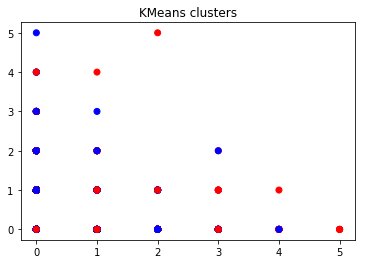

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['red', 'blue']

pred_colors = [colors[label] for label in kmeans.labels_]

plt.scatter(X[:, 2], X[:, 3], c=pred_colors)
plt.title('KMeans clusters')

# Phase 3 Visualization 

In [87]:
import pandas as pd
clean_train_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/Clean_Train_Data.csv", encoding='ISO-8859-1', engine='c')

In [88]:
from wordcloud import WordCloud
Postive_Train_list = clean_train_df[clean_train_df["label"] == "positive"]["review"].unique().tolist()

In [89]:
train_positive = " ".join(Postive_Train_list)

In [90]:
import matplotlib as plt
positive_wordcloud = WordCloud().generate(train_positive)    # Creating wordcloud

# Word Cloud of Positive Words                             

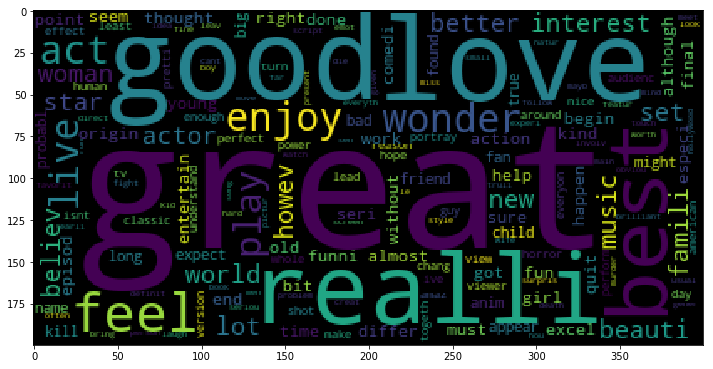

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(positive_wordcloud)
plt.show()

In [93]:
Negative_Train_list = clean_train_df[clean_train_df["label"] == "negative"]["review"].unique().tolist()
train_negative = " ".join(Negative_Train_list)

In [94]:
import matplotlib.pyplot as plt
negative_wordcloud = WordCloud().generate(train_negative)    # Creating wordcloud

# Word Cloud of Negative Words    

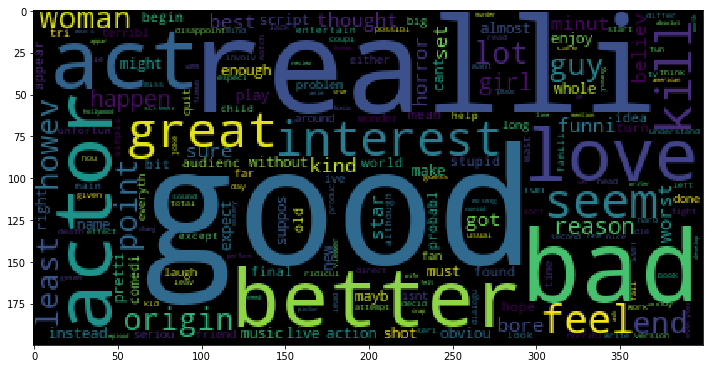

In [95]:
plt.figure(figsize=(12,12))
plt.imshow(negative_wordcloud)
plt.show()

In [86]:
# Histogram
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=300)

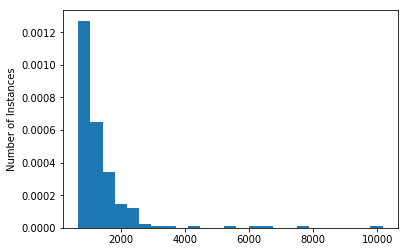

In [84]:
cv_pos = count_vect.fit_transform(clean_train_df['review'][clean_train_df.label == 'positive'])

pos_data = cv_pos.sum(axis=0).tolist()
plt.hist(pos_data, normed=True, bins=25)
plt.ylabel('Number of Instances')
plt.show()
#Histogram(Negative Words)

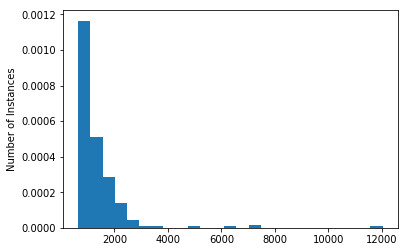

In [85]:
cv_pos = count_vect.fit_transform(clean_train_df['review'][clean_train_df.label == 'negative'])

pos_data = cv_pos.sum(axis=0).tolist()
plt.hist(pos_data, normed=True, bins=25)
plt.ylabel('Number of Instances')
plt.show()
# Histogram(Negative Words)

# Phase 4 Hypothesis testing  and Feature Selection

## 1. Create Hypothesis involving relationships between dependent and independent variables using parametric/non-parametric tests for various machine learning algorithms such as k-means clustering,  classification algorithms.

## Parametric Tests

In [65]:
import pandas as pd
clean_train_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/Clean_Train_Data.csv", encoding='ISO-8859-1', engine='c')
clean_test_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/Clean_Test_Data.csv", encoding='ISO-8859-1', engine='c')


### Concatnating Train and Test Data

In [66]:
clean_moviereview_df = pd.concat([clean_train_df, clean_test_df])

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=700)
count_vect.fit(clean_moviereview_df.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=700, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [71]:
X = count_vect.transform(clean_moviereview_df.review).toarray()

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(clean_moviereview_df.label)

## Classification Algorithms

### 1. Logistic Regression

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Using 80/20 rule to split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 



classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy is ', accuracy)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


The accuracy is  0.84748


## 2. Naive Bayes Classifier 

### Applying MultiNomial NB

In [73]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
prediction = clf.predict(X_train)

accuracy = accuracy_score(y_test, predictions)

print('The Accuracy is', accuracy)

The Accuracy is 0.82716


## 3. Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='gini')

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print('The Accuracy is', accuracy)

The Accuracy is 0.71336


## 4. Random Forest


In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print('The Accuracy is', accuracy)

The Accuracy is 0.74916


## 5. Support Vector Machine (SVM)

In [ ]:
#from sklearn.svm import SVC
#clf = SVC()

#clf.fit(X_train, y_train)

#predictions = clf.predict(X_test)
#accuracy = accuracy_score(y_test, predictions)
#print('The Accuracy is', accuracy)


In [ ]:
#### I tried to excute above SVM code, the system got hunged. 

### Result - From above accuracy scores, it has been observed that MultiNomial NB and Logistic Regression have almost same accuracies and have higher accuracies than Decision Tree and Random Forest

## Non-Parametric tests

##  K means Clustering

##### Applying max_features here since the system was getting an memory error everytime I tried to pass the entire data.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=400)

count_vect.fit(unsup_df.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=400, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
X = count_vect.transform(unsup_df.review).toarray()

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [18]:
kmeans.labels_

array([1, 1, 0, ..., 0, 1, 1])

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['red', 'blue']

pred_colors = [colors[label] for label in kmeans.labels_]

Text(0.5,1,'KMeans clusters')

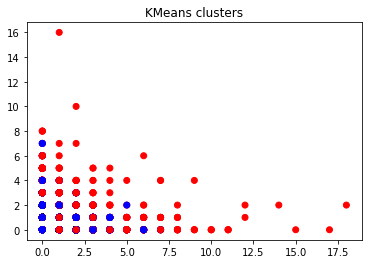

In [20]:
plt.scatter(X[:, 2], X[:, 3], c=pred_colors)
plt.title('KMeans clusters')

# Phase 5 Model Building

## 1. Supervised Learning

In [73]:
# Applying MultiNomial NB

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Applying 80/20 Rule

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
prediction = clf.predict(X_train)

accuracy = accuracy_score(y_test, predictions)

print('The Accuracy is', accuracy)

The Accuracy is 0.8207


In [76]:
test_data = clean_moviereview_df.head(10).review.tolist() + clean_moviereview_df.tail(10).review.tolist()
actual_label = clean_moviereview_df.head(10).label.tolist() + clean_moviereview_df.tail(10).label.tolist()

In [77]:
test_preds = clf.predict(count_vect.transform(test_data))

In [87]:
# Actual Data vs Predicted Data
i = 0
for sms, label in zip(test_data, actual_label):
    print(str(test_data[i][:100]) +" ("+ str(actual_label[i]) +") => "+ str(test_preds[i]) )
    i += 1

bromwel high cartoon comedi ran program teacher 35 teach profess lead believ bromwel high satir clos (positive) => 1
homeless houseless georg carlin state issu plan help street consid human everyth vote matter homeles (positive) => 1
brilliant overact lesley ann warren best dramat hobo ladi love cloth warehous second none corn class (positive) => 1
easili underr inn brook cannon sure flaw realist view homeless unlik citizen kane realist view loung (positive) => 1
typic mel brook le slapstick follow lesli ann warren fantast underr actress moment flesh bit probabl (positive) => 1
isnt comed robin william quirkyinsan robin william recent thriller fame hybrid classic drama without (positive) => 1
ye art success slow pace thriller unfold nice volum notic happen fine robin william sexual angl unne (positive) => 1
critic acclaim psycholog thriller true gabriel robin william celebr writer latenight talk host capti (positive) => 1
night listen 2006 12 robin william toni collett bobbi cannaval r

## 2. Unsupervised Learning

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# create an instance
count_vect = CountVectorizer(max_features=400)
# fit the vectorizer with data
count_vect.fit(unsup_df.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=400, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
X = count_vect.transform(unsup_df.review).toarray()

### Applying K-means algorithm

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [25]:
kmeans.labels_

array([1, 1, 0, ..., 0, 1, 1])

In [26]:
labels = ['positive', 'negative']

pred_labels = [labels[label] for label in kmeans.labels_]

In [31]:
print("Top words per cluster:-")

k_value = 2

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

words = count_vect.get_feature_names()

for i in range(k_value):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :30]:
        print(' %s' % words[ind]),
    print 

Top words per cluster:-
Cluster 0:
 like
 good
 realli
 bad
 love
 great
 act
 actor
 feel
 best
 get
 guy
 better
 lot
 woman
 new
 kill
 point
 live
 interest
 girl
 world
 there
 set
 end
 happen
 around
 seem
 action
 horror
Cluster 1:
 like
 good
 realli
 great
 bad
 love
 act
 actor
 best
 better
 interest
 funni
 enjoy
 lot
 feel
 woman
 live
 get
 star
 comedi
 new
 guy
 music
 believ
 play
 thought
 old
 end
 wonder
 cant


## Extra Credits

### 1. Supervised Learning: Compare the performance of different machine learning models, at least 2

In [88]:
# Applying MultiNomial NB
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Applying 80/20 Rule

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
prediction = clf.predict(X_train)

accuracy = accuracy_score(y_test, predictions)

print('The Accuracy is', accuracy)

The Accuracy is 0.8207


In [91]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion='gini')

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print('The Accuracy is', accuracy)

The Accuracy is 0.7128


### Obeserving above results, the accuracy of Multinomial Naive Bayes is higher than that of Decisin Tree.

### 3. Divide the data into more 4 clusters to enable finding more classes

In [36]:

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [40]:
print("Top words per cluster:-")

k_value = 6

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

words = count_vect.get_feature_names()

for i in range(k_value):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :40]:
        print(' %s' % words[ind]),
    print 

Top words per cluster:-
Cluster 0:
 like
 great
 good
 realli
 act
 best
 actor
 bad
 better
 love
 interest
 funni
 enjoy
 lot
 feel
 comedi
 live
 wonder
 star
 woman
 get
 new
 believ
 thought
 origin
 music
 end
 play
 old
 action
 minut
 cant
 set
 ive
 fan
 must
 got
 world
 laugh
 young
Cluster 1:
 like
 realli
 good
 great
 woman
 best
 live
 new
 world
 actor
 act
 get
 young
 interest
 feel
 set
 love
 point
 kill
 girl
 howev
 play
 around
 star
 seem
 better
 end
 final
 war
 old
 quit
 happen
 famili
 action
 effect
 lot
 believ
 long
 seri
 enough
Cluster 2:
 like
 good
 realli
 bad
 great
 act
 love
 guy
 get
 feel
 lot
 best
 kill
 actor
 there
 better
 horror
 point
 happen
 around
 origin
 girl
 seem
 new
 live
 set
 end
 interest
 pretti
 cant
 isnt
 reason
 woman
 play
 bit
 quit
 action
 right
 old
 enough
Cluster 3:
 love
 like
 great
 good
 realli
 best
 woman
 beauti
 feel
 live
 act
 girl
 young
 music
 fall
 actor
 wonder
 new
 interest
 enjoy
 get
 famili
 pl

### 4. Active Learning: Cluster the training dataset and try and find the genre. 

In [42]:
import pandas as pd
clean_train_df = pd.read_csv("C:/Users/Gaurav/Desktop/Digital Vidya/Capstone Project 1 Natural Language Processing/Clean_Train_Data.csv", encoding='ISO-8859-1', engine='c')

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features=300)

count_vect.fit(clean_train_df.review)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=300, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [58]:
X = count_vect.transform(clean_train_df.review).toarray()

In [62]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [64]:
print("Top words per cluster:-")

k_value = 6

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

words = count_vect.get_feature_names()

for i in range(k_value):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :40]:
        print(' %s' % words[ind]),
    

Top words per cluster:-
Cluster 0:
 bad
 like
 act
 good
 realli
 guy
 actor
 worst
 better
 funni
 get
 script
 effect
 minut
 cant
 ive
 pretti
 great
 lot
 got
 horror
 kill
 reason
 least
 isnt
 aw
 wast
 action
 terribl
 best
 stupid
 there
 believ
 feel
 love
 bore
 laugh
 money
 wors
 big
Cluster 1:
 like
 great
 realli
 good
 act
 love
 best
 actor
 better
 bad
 interest
 enjoy
 funni
 feel
 wonder
 get
 lot
 star
 old
 believ
 comedi
 new
 origin
 live
 woman
 music
 cant
 end
 world
 thought
 ive
 set
 got
 minut
 play
 famili
 young
 fan
 quit
 time
Cluster 2:
 good
 like
 realli
 great
 act
 actor
 bad
 love
 better
 pretti
 best
 lot
 enjoy
 interest
 funni
 feel
 get
 quit
 guy
 thought
 action
 end
 bit
 comedi
 expect
 horror
 howev
 music
 origin
 point
 time
 star
 got
 play
 big
 old
 enough
 effect
 script
 fun
Cluster 3:
 like
 realli
 good
 bad
 great
 act
 feel
 love
 actor
 get
 guy
 better
 lot
 best
 woman
 point
 there
 new
 horror
 origin
 seem
 interest
 ki

## Clusters contain following genres:-

### Cluster 0 -  Horror, Action , War

### Cluster 1 -  Musical, Comedy

### Cluster 2 - Comedy, Musical, Horror

### Cluseter 3 - Horror, Musical

### Cluster 4 - Musical

### Cluster 5 - Musical, TV Series